<div style='background-image: url("./images/header_l1.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">ObsPy Tutorial</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Handling Waveform Data</div>
        </div>
    </div>
</div>

## Welcome to the Seismic signal & Noise analysis class. We are glad to see you in this class. The intership course will teach you how we work in seismic waveform in Python. The course include Obspy, PSD-PDF, microseism, and MSNoise. 

![](../images/obspy_logo_full_524x179px.png)

So we have to check everyone has already installed Python successfully. Change your dictionary to our class folder (\Internship_course\lesson_1). Open terminal and type jupyter notebook. 

In [1]:
print "Hello world"

Hello world


---
### Install Obspy
First, installing Obspy.
In termanal tpye the commands below:
* conda config --add channels conda-forge
* conda install obspy

If it is successful. Excute command below.

In [2]:
%matplotlib inline
import obspy

---
### Stream & Trace
Using the obspy for reading the waveform data.

In [3]:
st = obspy.read("data/TPUB.HHE.IES_BATS.01_2016.036.sac")
st += obspy.read("data/TPUB.HHN.IES_BATS.01_2016.036.sac")
st += obspy.read("data/TPUB.HHZ.IES_BATS.01_2016.036.sac")

Plot the 3 components waveform.

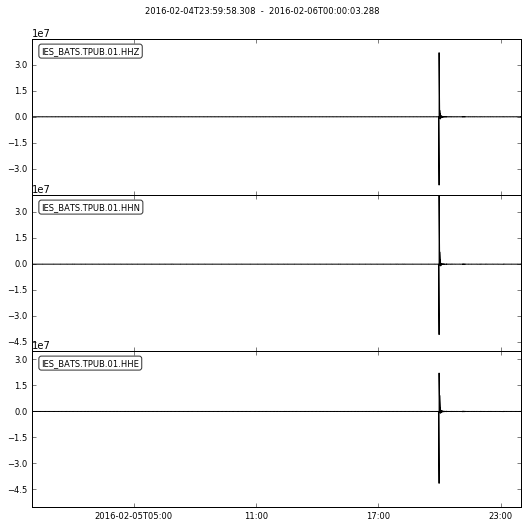

In [4]:
st.plot()

Only for E component.

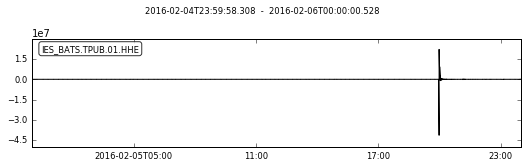

In [5]:
tr_e = st[0]
tr_e.plot()

Only for N component.

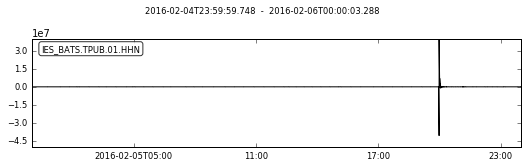

In [6]:
tr_n = st[1]
tr_n.plot()

Only for Z component.

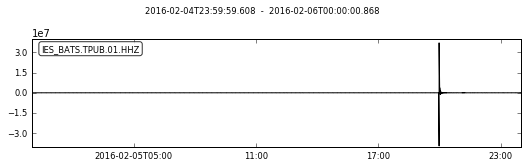

In [7]:
tr_z = st[2]
tr_z.plot()

Reading header information, take Z component for example.

In [8]:
print tr_z.stats

         network: IES_BATS
         station: TPUB
        location: 01
         channel: HHZ
       starttime: 2016-02-04T23:59:59.608000Z
         endtime: 2016-02-06T00:00:00.868000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 8640127
           calib: 1.0
         _format: SAC
             sac: AttribDict({u'cmpaz': 0.0, u'nzyear': 2016, u'nzjday': 35, u'iztype': 9, u'khole': u'01      ', u'knetwk': u'IES_BATS', u'lcalda': 1, u'idep': 5, u'iftype': 1, u'nvhdr': 6, u'unused23': 1, u'kcmpnm': u'HHZ     ', u'nzsec': 59, u'internal0': 2.0, u'stel': 370.0, u'lovrok': 1, u'cmpinc': 0.0, u'delta': 0.0099999998, u'stla': 23.300501, u'kdatrd': u'        ', u'nzmsec': 608, u'lpspol': 1, u'b': 0.0, u'e': 86401.266, u'leven': 1, u'stlo': 120.6296, u'ko': u'origin ', u'o': 0.39170003, u'kstnm': u'TPUB    ', u'nzmin': 59, u'npts': 8640127, u'nzhour': 23})


If you want to read specific header information like station name.

In [9]:
print tr_z.stats.station

TPUB


## Exercises 1

Reading network name, station lontitude and latitude.

In [10]:
# exercise 1
print tr_z.stats.network, tr_z.stats.sac.stlo, tr_z.stats.sac.stla 

IES_BATS 120.63 23.3005


---
### UTCDateTime & Slice
#### Initialization

In [11]:
print(obspy.UTCDateTime("2011-03-11T05:46:23.2"))        # mostly time strings defined by ISO standard
print(obspy.UTCDateTime("2011-03-11T14:46:23.2+09:00"))  # non-UTC timezone input
print(obspy.UTCDateTime(2011, 3, 11, 5, 46, 23, 2))
print(obspy.UTCDateTime(1299822383.2))

2011-03-11T05:46:23.200000Z
2011-03-11T05:46:23.200000Z
2011-03-11T05:46:23.000002Z
2011-03-11T05:46:23.200000Z


In [12]:
# Current time can be initialized by leaving out any arguments
print(obspy.UTCDateTime())

2017-03-07T07:12:54.210000Z


#### Attribute Access

In [13]:
time = obspy.UTCDateTime("2011-03-11T05:46:23.200000Z")
print(time.year)
print(time.julday)
print(time.timestamp)
print(time.weekday)
# try time.<Tab>

2011
70
1299822383.2
4


#### Handling time differences

* "**`+`**/**`-`**" defined to add seconds to an **`UTCDateTime`** object
* "**`-`**" defined to get time difference of two **`UTCDateTime`** objects

In [14]:
time = obspy.UTCDateTime("2011-03-11T05:46:23.200000Z")
print(time)

2011-03-11T05:46:23.200000Z


In [15]:
# one hour later
print(time + 3600)

2011-03-11T06:46:23.200000Z


In [16]:
time2 = obspy.UTCDateTime(2012, 1, 1)
print(time2 - time)

25553616.8


#### Slice
If we want to show the Meinong earthquake signal, need to zoom in earthqukae occurred time (2016-02-05T19:57:26.100000Z) from daily waveform.

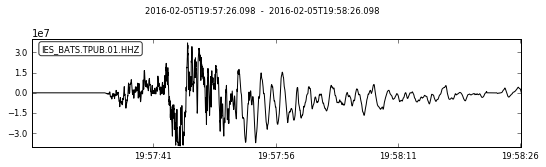

In [17]:
eq_time = obspy.UTCDateTime("2016-02-05T19:57:26.100000Z")
tr_z = tr_z.slice(eq_time, eq_time+60)
tr_z.plot()

#### Save
- automatic file format detection, no need to worry about file formats

  - currently supported: **mseed, sac, segy, seg2, gse1/2, seisan, sh, datamark, css, wav, y, Q, kinemetrics Evt, K-NET & KiK-net data, pdas (keeps growing...)**
  - more file formats are included whenever a basic reading routine is provided (or e.g. sufficient documentation on data compression etc.)
  - custom user-specific file formats can be added (through plugin) to filetype autodiscovery in local ObsPy installation by user

In [18]:
tr_z.write("slice_TPUB.mseed", format="mseed")
tr_z.write("slice_TPUB.sac", format="sac")
print (tr_z)

IES_BATS.TPUB.01.HHZ | 2016-02-05T19:57:26.098000Z - 2016-02-05T19:58:26.098000Z | 100.0 Hz, 6001 samples


## Exercise 2

The aftershock at 2016-02-05T20:00:06.100000Z. Please try to slice E componet waveform in 60s aftershock time.

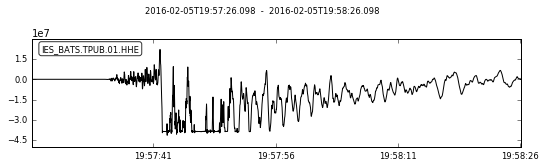

In [23]:
# pratice 2
tr_e = tr_e.slice(eq_time, eq_time + 60)
tr_e.plot()

---
### Section profile plot

In [20]:
import glob
saclist = glob.glob("data/*.??E.*.sac")
st = obspy.core.Stream()
eq_lon, eq_lat = 120.54, 22.93
for i, sl in enumerate(saclist):
    st += obspy.read(sl)
    print sl
    tr = st[i]
    tr_lon, tr_lat = tr.stats.sac.stlo, tr.stats.sac.stla
    dist, az, baz = obspy.geodetics.gps2dist_azimuth(eq_lat, eq_lon, tr_lat, tr_lon)
    tr.stats.distance = dist

data\CHGB.HHE.IES_BATS.01_2016.036.sac
data\MASB.HHE.IES_BATS.01_2016.036.sac
data\NACB.HHE.IES_BATS.01_2016.036.sac
data\TPUB.HHE.IES_BATS.01_2016.036.sac
data\TWKB.HHE.IES_BATS.01_2016.036.sac
data\WFSB.HHE.IES_BATS.01_2016.036.sac
data\YULB.HHE.IES_BATS.01_2016.036.sac


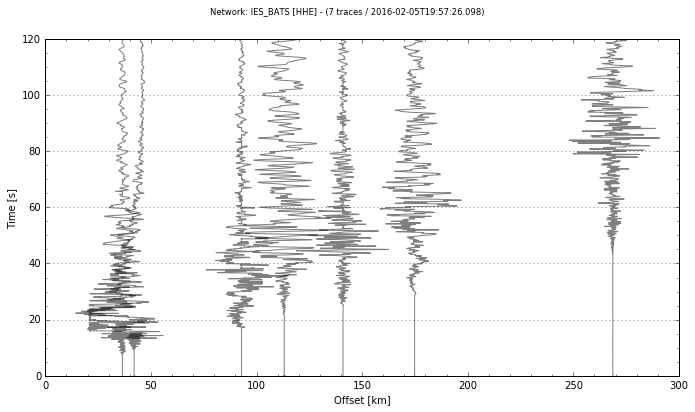

In [21]:
st = st.slice(eq_time, eq_time + 120)
st.plot(type='section')

In [22]:
st.plot(type='section', outfile='section.png')